# IMAGE COMPRESSION USING K-MEANS CLUSTERING

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
from scipy import misc 
from PIL import Image

In [46]:
img = Image.open('animal.png')

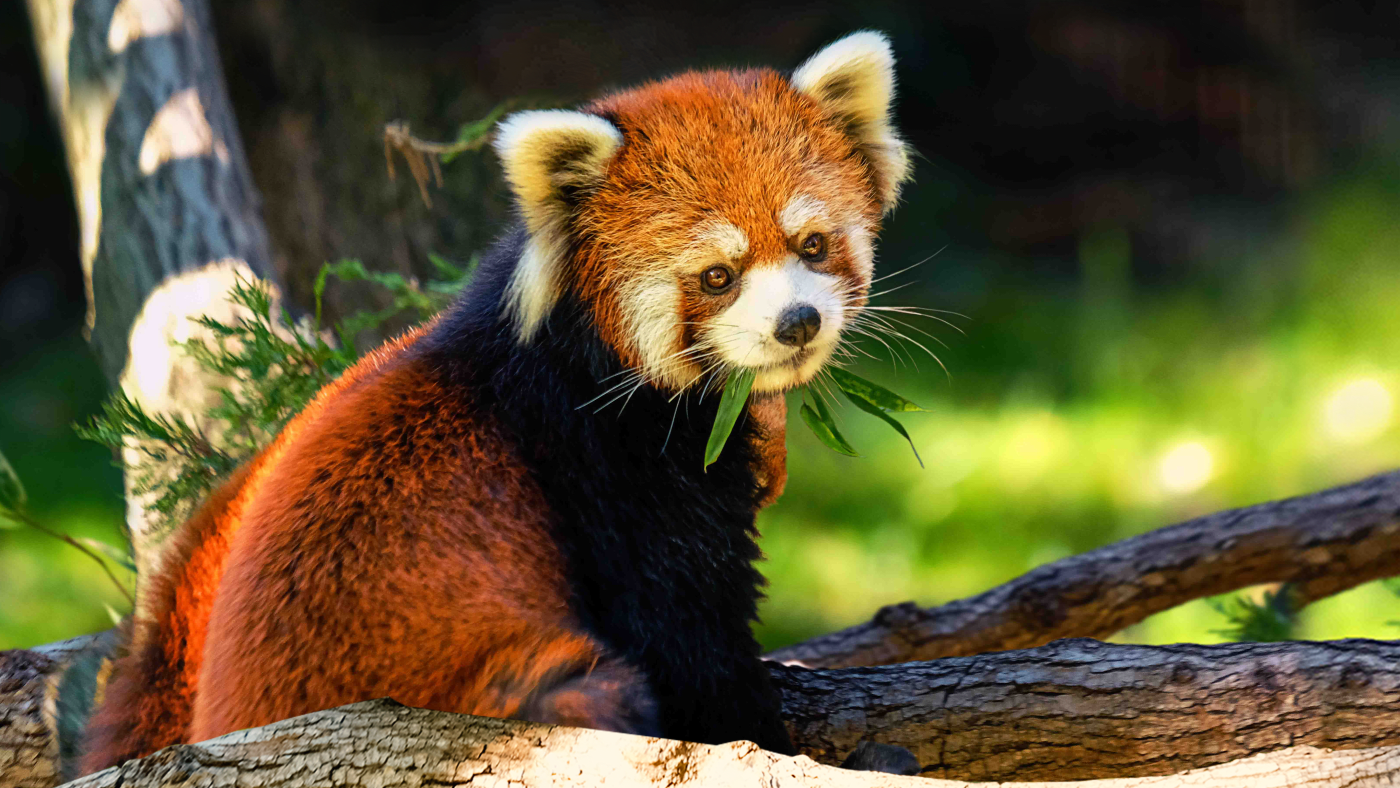

In [40]:
img

In [47]:
img_matrix = np.asarray(img)

In [48]:
img_matrix.shape

(788, 1400, 4)

In [49]:
img.height,img.width

(788, 1400)

In [50]:
img_matrix=np.reshape(img_matrix, (img.height*img.width,4))

In [51]:
img_matrix

array([[ 12,  12,  12, 255],
       [ 12,  12,  12, 255],
       [ 12,  12,  12, 255],
       ...,
       [231, 210, 193, 255],
       [230, 211, 190, 255],
       [231, 211, 191, 255]], dtype=uint8)

In [52]:
img_matrix.shape

(1103200, 4)

In [53]:
from sklearn.cluster import KMeans
comp = KMeans(n_clusters = 16)
comp.fit(img_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
centroid =  np.array([list(comp.cluster_centers_[label]) for label in comp.labels_])

In [55]:
centroid = centroid.astype("uint8")
centroid

array([[ 14,  14,  13, 255],
       [ 14,  14,  13, 255],
       [ 14,  14,  13, 255],
       ...,
       [245, 234, 209, 255],
       [245, 234, 209, 255],
       [245, 234, 209, 255]], dtype=uint8)

In [56]:
centroids_reshaped = np.reshape(centroid, (788, 1400, 4), "C")


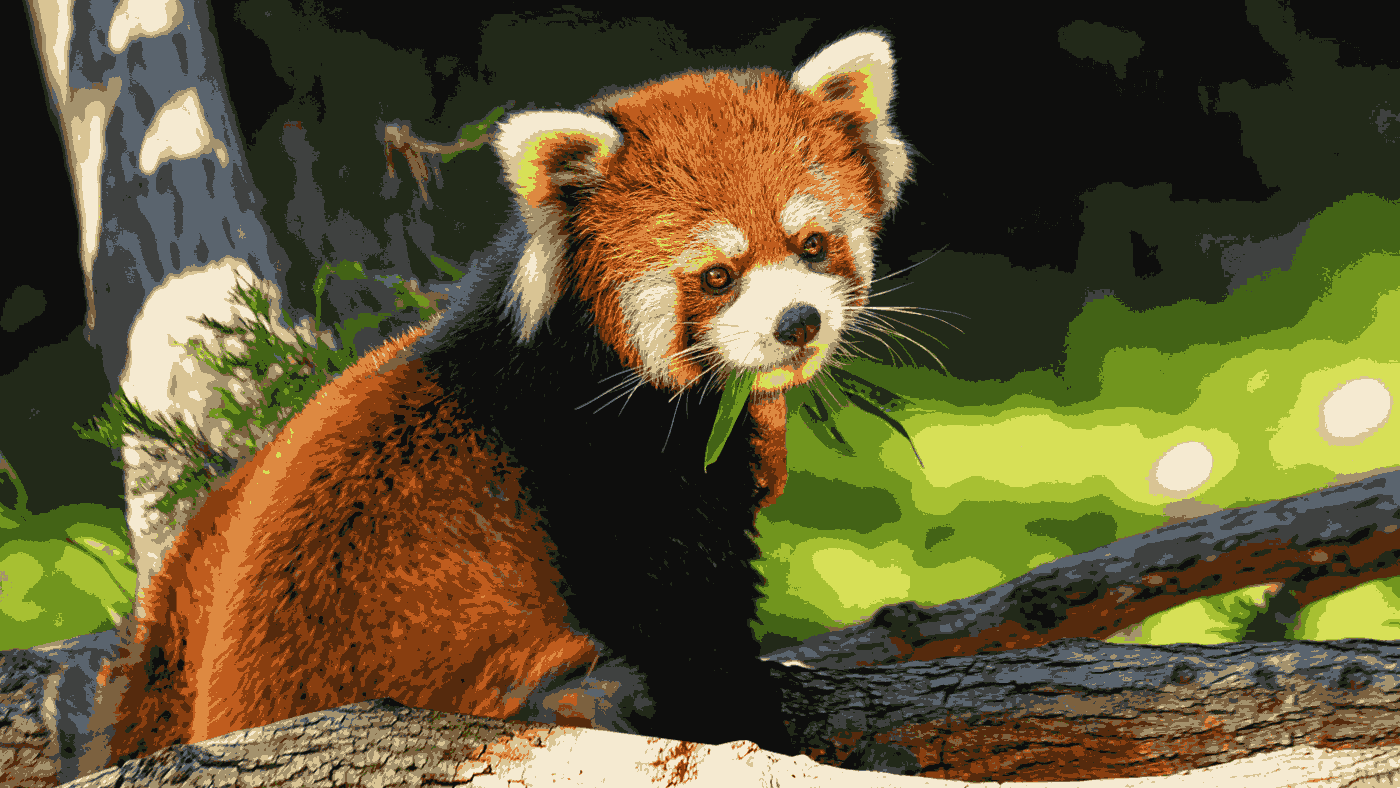

In [57]:
compressed_im = Image.fromarray(centroids_reshaped)
compressed_im.save("animal_compressed.png")
compressed_im